##### **SKIN CANCER DETECTION USING CONVOLUTIONAL NEURAL NETWORKS IN DEEP LEARNING**
##### BY: *JATIN YADAV*
##### UNIVERSITY: *DTU*
##### UNIVERSITY_ROLL_NO: 2K21/CO/213

##### **IMPORTING KERAS :**

In [74]:
import keras
from keras import layers,models

##### **BUILDING THE CNN MODEL :**

In [75]:
model=keras.models.Sequential([
    keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(64,(3,3),activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(128,(3,3),activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Conv2D(200,(3,3),activation='relu'),
    keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [76]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 10, 10, 128)      

##### **COMPILING THE MODEL :**

In [77]:
from keras import optimizers
model.compile(
    loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

In [78]:
import os 

##### *The Dataset for this project has been taken from* **Kaggle**.

In [79]:
test_dir='C:\\Users\\DELL\\Desktop\\cancer\\test'
val_dir='C:\\Users\\DELL\\Desktop\\cancer\\validation'
train_dir='C:\\Users\\DELL\\Desktop\\cancer\\train'

In [80]:
print('total validation malignant images: ',len(os.listdir('C:\\Users\\DELL\\Desktop\\cancer\\validation\\val_malignant')))

total validation malignant images:  55


##### **DATA PROCESSING :**

In [81]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)
train_gen=train_datagen.flow_from_directory(
    train_dir,
    target_size=(100,100),
    batch_size=20,
    class_mode='binary'
)
val_gen=test_datagen.flow_from_directory(
    val_dir,
    target_size=(100,100),
    batch_size=10,
    class_mode='binary',
)

Found 148 images belonging to 2 classes.
Found 63 images belonging to 2 classes.


In [82]:
for data_batch,labels_batch in train_gen:
    print('data batch shape: ',data_batch.shape)
    print('labels batch shape: ',labels_batch.shape)
    break #important

data batch shape:  (20, 100, 100, 3)
labels batch shape:  (20,)


##### **TRAINING THE CNN MODEL :**

In [83]:
history=model.fit(
    train_gen,
    steps_per_epoch=7,
    epochs=4,
    validation_data=val_gen,
    validation_steps=5
)

Epoch 1/4


7/7 [==============================] - 3s 294ms/step - loss: 0.4402 - accuracy: 0.8672 - val_loss: 0.4198 - val_accuracy: 0.8400
Epoch 2/4
7/7 [==============================] - 2s 224ms/step - loss: 0.2855 - accuracy: 0.9062 - val_loss: 0.3357 - val_accuracy: 0.8800
Epoch 3/4
7/7 [==============================] - 2s 236ms/step - loss: 0.2970 - accuracy: 0.8984 - val_loss: 0.3333 - val_accuracy: 0.8800
Epoch 4/4
7/7 [==============================] - 2s 231ms/step - loss: 0.3080 - accuracy: 0.8906 - val_loss: 0.3486 - val_accuracy: 0.8800


In [93]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

##### **VISUALISING THE TRAINING AND VALIDATION LOSS :**

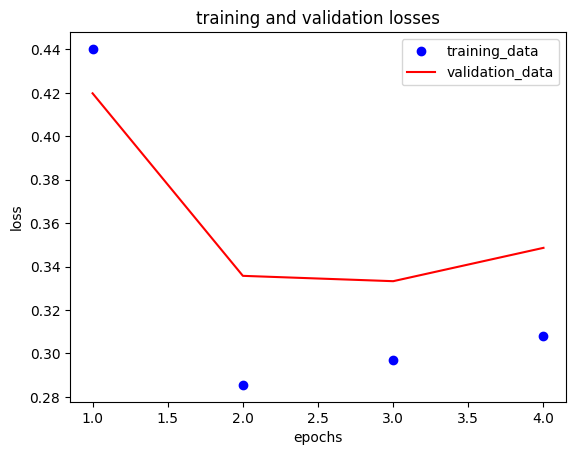

In [94]:
import matplotlib.pyplot as plt
loss_val=history_dict['loss']
val_loss_val=history_dict['val_loss']
epochs=range(1,len(history_dict['accuracy'])+1)
plt.plot(epochs,loss_val,'bo',label='training_data')
plt.plot(epochs,val_loss_val,'r',label='validation_data')
plt.title('training and validation losses')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

##### **VISUALISING THE TRAINING AND VALIDATION ACCURACY :**

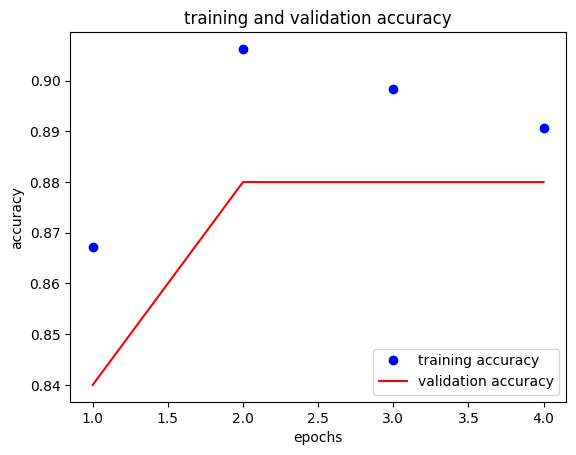

In [95]:
acc_val=history_dict['accuracy']
val_acc_val=history_dict['val_accuracy']
plt.plot(epochs,acc_val,'bo',label='training accuracy')
plt.plot(epochs,val_acc_val,'r',label='validation accuracy')
plt.title('training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

##### **ACCURACY ON TEST DATASET :**

In [84]:
test_gen=test_datagen.flow_from_directory(
    test_dir,
    target_size=(100,100),
    batch_size=5,
    class_mode='binary'
)
test_loss,test_acc=model.evaluate(test_gen,steps=10)
print('test accuracy: ',test_acc)

Found 59 images belonging to 2 classes.
10/10 [==============================] - 0s 19ms/step - loss: 0.3060 - accuracy: 0.9200
test accuracy:  0.9200000166893005


##### We got the test accuracy of about **92%**.
##### *i.e.*, Our model is able to detect the skin cancer correctly in about *92%* of the cases, which is not bad considering that we haven't applied any *Data Augmentation*.

##### This was a project concerned with detection of skin cancer using Convolutional Neural Networks(CNN) in Deep Learning.
##### BY: **JATIN YADAV**